# Lily's Taco Bell menu data scrape

In [143]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np

In [144]:
# This is my base url and header which I use throughout this project
url = 'https://www.tacobell.com'
header = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36',
}

## What types of food does Taco Bell sell?

In [145]:
# get html from main url
main_pg = requests.get(url+'/food', headers=header)
main_pg_soup = BeautifulSoup(main_pg.content, 'html.parser')

In [146]:
# get types of food and urls
food_cats = []
cat_nms = []
food_types = main_pg_soup.find_all('div', attrs={'class':'menu-tile___3x64l menu-tile___weSh0'})

for food_type in food_types:

    name = food_type.find('span',attrs={'class':'label___3SuFg'})
    name = name.get_text()
    
    link = food_type.find('a')['href']
    link = url+link
    
    if name != 'My Cravings' and name != 'New' and name != 'Online Exclusives' and name != 'Combos' and name != 'Specialties' and name != 'Value Menu' and name != 'Drinks' and name != 'Sides & Sweets':
        cat = (name,link)
        food_cats.append(cat)
        cat_nms.append(name)

print('There are '+str(len(food_cats))+' categories of food at Tacobell: '+str(cat_nms))

There are 8 categories of food at Tacobell: ['Tacos', 'Burritos', 'Nachos', 'Quesadillas', 'Groups', 'Veggie Cravings', 'Bowls', 'Breakfast']


## What foods does Tacobell sell?

In [147]:
foods = []
food_nms = []

for food_cat in food_cats:
    cat_pg = requests.get(food_cat[1], headers=header)
    cat_pg_soup = BeautifulSoup(cat_pg.content, 'html.parser')

    cat_foods = cat_pg_soup.find_all('div', attrs={'class':'product-item'})
    for cat_food in cat_foods:

        name = cat_food.find('div', attrs={'class':'product-name'})
        name = name.get_text()
        name = name.replace('\n', '')

        price = cat_food.find('div', attrs={'class':'product-price'})
        price = price.get_text()
        price = price.replace('$', '')
        price = price.replace('\n', '')

        if name != 'Mountain Dew® Kickstart™ Orange Citrus - Small' and name != 'Breakfast Salsa':
            food = (name,float(price))
            foods.append(food)
            food_nms.append(name)

print('There are '+str(len(foods))+' foods at Tacobell: '+str(food_nms))

There are 73 foods at Tacobell: ['Naked Chicken Chalupa', 'Soft Taco', 'Soft Taco Supreme®', 'Crunchy Taco', 'Crunchy Taco Supreme®', '3 Crunchy Tacos Combo', '3 Crunchy Tacos Supreme® Combo', 'Nacho Cheese Doritos® Locos Tacos', 'Nacho Cheese Doritos® Locos Tacos Supreme®', 'Chalupa Supreme', 'Cheesy Gordita Crunch', 'Supreme Taco Party Pack', 'Soft Taco Party Pack', 'Supreme Soft Taco Party Pack', 'Bean Burrito', 'Beefy 5-Layer Burrito', 'Quesarito', 'Burrito Supreme®', 'Crunchwrap Supreme®', 'Grande Nachos Box', 'Nachos Party Pack', 'Veggie Nachos Party Pack', 'Nachos BellGrande®', 'Nachos BellGrande® Combo', 'Chips and Nacho Cheese Sauce', 'Chicken Quesadilla', 'Chicken Quesadilla Combo', 'Steak Quesadilla', 'Cheese Quesadilla', 'Black Bean Quesarito', 'Quesarito', 'Nachos Party Pack', 'Veggie Nachos Party Pack', 'Drinks Party Pack', 'Taco & Burrito Cravings Pack', 'Taco Party Pack', 'Soft Taco Party Pack', 'Variety Taco Party Pack', 'Supreme Taco Party Pack', 'Supreme Soft Taco Pa

## What are the prices of the foods at Tacobell?

### What is the averaage price of the food at Tacobell?

In [148]:
avg_price = 0
for food in foods:
    avg_price+=food[1]

avg_price/=len(foods)
avg_price = round(avg_price,2)

print('The average price of food at Tacobell is $'+str(avg_price))

The average price of food at Tacobell is $5.31


### What is the standard deviation of the price of Tacobell foods?

In [149]:
sd = 0
for food in foods:
    sd+=((avg_price-food[1])*(avg_price-food[1]))

sd/=len(foods)
sd = np.sqrt(sd)
sd = round(sd,2)

print('The standard deviation of the price of food at Tacobell is $'+str(sd))

The standard deviation of the price of food at Tacobell is $4.75


### What is the most and least expensive food at Tacobell?

In [150]:
max_price = 0
min_price = 0

for i in range(0,len(foods)):
    if foods[i][1] < foods[min_price][1]:
        min_price = i
    if foods[i][1] > foods[max_price][1]:
        max_price = i

print('The most expensive food at Tacobell is '+foods[max_price][0]+'. It costs $'+str(foods[max_price][1]))
print('The least expensive food at Tacobell is '+foods[min_price][0]+'. It costs $'+str(foods[min_price][1]))

The most expensive food at Tacobell is Supreme Variety Taco Party Pack. It costs $18.99
The least expensive food at Tacobell is Chips and Nacho Cheese Sauce. It costs $1.0


### Make a bar graph of the prices of foods at Tacobell

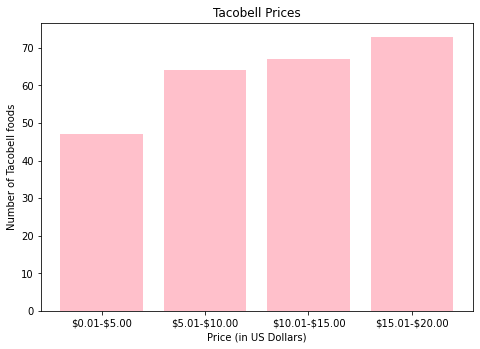

In [151]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
price_ranges = ['\$0.01-$5.00', '\$5.01-$10.00', '\$10.01-$15.00', '\$15.01-$20.00']
amts = [0,0,0,0]

for food in foods:
    if food[1] <= 5:
        amts[0]+=1
    if food[1] <= 10:
        amts[1]+=1
    if food[1] <= 15:
        amts[2]+=1
    if food[1] <= 20:
        amts[3]+=1

ax.bar(price_ranges,amts,color='pink')
ax.set_title('Tacobell Prices')
ax.set_xlabel('Price (in US Dollars)')
ax.set_ylabel('Number of Tacobell foods')
plt.show()